# Spatially Enabled DataFrames - Advanced Topics

The information in this section provides a brief introduction to advanced topics with the `Spatially Enabled DataFrame` structure.

One of the most important tasks for software applications is to quickly retrieve and process information. Enterprise systems, whether storing GIS information or not, all utilize the concept of indexing to allow for quick searching through large data stores to locate and select specific information for subsequent processing.

This document will outline how row and column indexing work in Spatially Enabled Dataframes and also demonstrate building a spatial index on dataframe geometries to allow for quick searching, accessing, and processing. The document will also demonstrate spatial joins to combine dataframes.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spatially-Enabled-DataFrames---Advanced-Topics" data-toc-modified-id="Spatially-Enabled-DataFrames---Advanced-Topics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Spatially Enabled DataFrames - Advanced Topics</a></span><ul class="toc-item"><li><span><a href="#DataFrame-Index" data-toc-modified-id="DataFrame-Index-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>DataFrame Index</a></span></li><li><span><a href="#Describing-the-DataFrame" data-toc-modified-id="Describing-the-DataFrame-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Describing the DataFrame</a></span><ul class="toc-item"><li><span><a href="#Example:-Displaying-info-on-Spatially-Enabled-DataFrame-(SEDF)" data-toc-modified-id="Example:-Displaying-info-on-Spatially-Enabled-DataFrame-(SEDF)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Example: Displaying info on Spatially Enabled DataFrame (SEDF)</a></span></li><li><span><a href="#Slicing-DataFrames" data-toc-modified-id="Slicing-DataFrames-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Slicing DataFrames</a></span></li></ul></li><li><span><a href="#Spatial-Index" data-toc-modified-id="Spatial-Index-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Spatial Index</a></span></li><li><span><a href="#Intersection-with-the-Spatial-Index" data-toc-modified-id="Intersection-with-the-Spatial-Index-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Intersection with the Spatial Index</a></span></li><li><span><a href="#Spatial-Joins" data-toc-modified-id="Spatial-Joins-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Spatial Joins</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Example:-Merging-State-Statistics-Information-with-Cities" data-toc-modified-id="Example:-Merging-State-Statistics-Information-with-Cities-1.5.0.1"><span class="toc-item-num">1.5.0.1&nbsp;&nbsp;</span>Example: Merging State Statistics Information with Cities</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>


## DataFrame Index

As mentioned in the [Introduction to the Spatially Enabled DataFrame guide](../introduction-to-the-spatially-enabled-dataframe), the Pandas [DataFrame structure](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) underlies the ArcGIS API for Python's Spatially Enabled DataFrame. Pandas DataFrames are analagous to spreadsheets. They have a row axis and a column axis. Each of these axes are indexed and labeled for quick and easy identification, data alignment, and retrieval and updating of data subsets.

Let's explore the axes labels and indices and how they allow for data exploraation:


In [1]:
from arcgis.gis import GIS

gis = GIS()

When working with an ArcGIS Online feature layer, the [`query()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayer.query) method returns a `FeatureSet` object which has a `sdf` method to instantiate a Spatially Enabled DataFrame.


In [2]:
item = gis.content.search(
    "USA Major Cities", item_type="Feature layer", outside_org=True)[0]
flayer = item.layers[0]
df = flayer.query(where="AGE_45_54 < 1500").sdf
df.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,"{""x"": -12462673.723706165, ""y"": 5384674.994080..."
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,"{""x"": -12506251.313993266, ""y"": 5341537.793529..."
2,4,Burley,city,ID,16,1611260,,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,"{""x"": -12667411.402393516, ""y"": 5241722.820606..."
3,6,Chubbuck,city,ID,16,1614680,,6,14655,13922,...,1281,172,370,3586,3.4,4961,229,3324,1408,"{""x"": -12520053.904151963, ""y"": 5300220.333409..."
4,12,Jerome,city,ID,16,1641320,,6,11403,10890,...,779,210,385,2640,3.44,3985,292,2219,1474,"{""x"": -12747828.64784961, ""y"": 5269214.8197742..."


## Describing the DataFrame

The `DataFrame.info()` provides a concise summary of the object. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

### Example: Displaying info on Spatially Enabled DataFrame (SEDF)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         316 non-null    Int64   
 1   NAME        316 non-null    string  
 2   CLASS       316 non-null    string  
 3   ST          316 non-null    string  
 4   STFIPS      316 non-null    string  
 5   PLACEFIPS   316 non-null    string  
 6   CAPITAL     316 non-null    string  
 7   POP_CLASS   316 non-null    Int32   
 8   POPULATION  316 non-null    Int32   
 9   POP2010     316 non-null    Int32   
 10  WHITE       316 non-null    Int32   
 11  BLACK       316 non-null    Int32   
 12  AMERI_ES    316 non-null    Int32   
 13  ASIAN       316 non-null    Int32   
 14  HAWN_PI     316 non-null    Int32   
 15  HISPANIC    316 non-null    Int32   
 16  OTHER       316 non-null    Int32   
 17  MULT_RACE   316 non-null    Int32   
 18  MALES       316 non-null    Int32   
 19  FEMALES 

We can see that the `SHAPE` column is of type `geometry`. This means that compared to the legacy `SpatialDataFrame` class, geometry columns are now unique instead of being just of type `object`.

We can get information about each axis label (aka, `index`) with the `axes` property on the spatial dataframe.


In [4]:
print("{:<15}{}\n\n{}{}".format("Row axis: ",
      df.axes[0], "Column axis: ", df.axes[1]))

Row axis:      RangeIndex(start=0, stop=316, step=1)

Column axis: Index(['FID', 'NAME', 'CLASS', 'ST', 'STFIPS', 'PLACEFIPS', 'CAPITAL',
       'POP_CLASS', 'POPULATION', 'POP2010', 'WHITE', 'BLACK', 'AMERI_ES',
       'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES',
       'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
       'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M',
       'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F',
       'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES',
       'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'SHAPE'],
      dtype='object')


Row axis information informs us we can retrieve information using the the dataframe [`loc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html#pandas.DataFrame.loc) attribute and any value in the range 0-317 inclusive to access a row. Column axis information tells us we can use any string in the index to return an attribute column:


In [5]:
df.loc[0]  # the first row returned

FID                                                           1
NAME                                                      Ammon
CLASS                                                      city
ST                                                           ID
STFIPS                                                       16
PLACEFIPS                                               1601990
CAPITAL                                                        
POP_CLASS                                                     6
POPULATION                                                15181
POP2010                                                   13816
WHITE                                                     13002
BLACK                                                        73
AMERI_ES                                                     67
ASIAN                                                       113
HAWN_PI                                                       9
HISPANIC                                

In [6]:
df["POP2010"]  # the data from the `POP2010` attribute column

0      13816
1      11899
2      10345
3      13922
4      10890
       ...  
311     9089
312    10272
313     9761
314     7855
315     9845
Name: POP2010, Length: 316, dtype: Int32

### Slicing DataFrames

We can access rows, columns and subsets of rows and columns using Python slicing:


In [7]:
# rows 0-9 with a subset of columns indexed as a list
df.loc[0:9][["FID", "NAME", "ST", "POP2010", "POPULATION"]]

,FID,NAME,ST,POP2010,POPULATION
0,1,Ammon,ID,13816,15181
1,2,Blackfoot,ID,11899,11946
2,4,Burley,ID,10345,10727
3,6,Chubbuck,ID,13922,14655
4,12,Jerome,ID,10890,11403
5,13,Kuna,ID,15210,18179
6,21,Rexburg,ID,25484,28019
7,143,Macomb,IL,19288,19838
8,151,Minooka,IL,10924,11815
9,186,Plano,IL,10856,11164


We can use indexing to access `SHAPE` information and draw it on a map:


In [24]:
df[df["NAME"].str.contains("Camp Pendleton South")]

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
69,1035,Camp Pendleton South,Census Designated Place,CA,06,0610561,,6,10450,10616,...,389,37,169,2500,3.69,2865,296,11,2558,"{""x"": -13066535.250599463, ""y"": 3925680.810605..."


Note that, the resulting `Series` might not show as in row `69` everytime, so it is important to the update the following cell to point to the corresponding row according to the current output. Also, `SHAPE` is one of the many Key Value Pairs of the `dict` object created from the resulting `Series`, that we are going to print as it is, and render on the map.


In [36]:
camp_pendleton_s_geodefn = dict(df.loc[69]).get(
    "SHAPE"
)  # geometry definition from row 2
print(camp_pendleton_s_geodefn)

{'x': -13066535.250599463, 'y': 3925680.810605321, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}



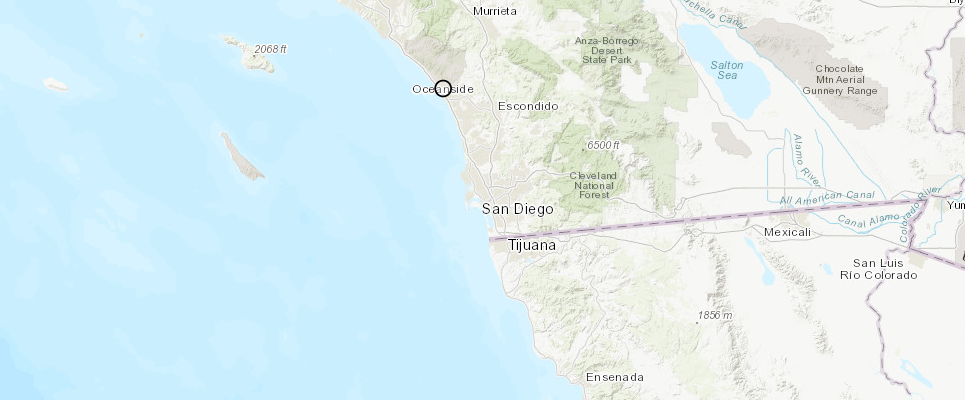

In [66]:
m = gis.map("San Diego, CA")
m

In [38]:
# draw the camp `point`
m.content.draw(camp_pendleton_s_geodefn)

## Spatial Index

In addition to row and column indexes to search a DataFrame, we can use spatial indexes to quickly access information based on its location and relationship with other features. They are based on the concept of a **minimum bounding rectangle** - the smallest rectangle that contains an entire geometric shape. Each of these rectangles are then grouped into `leaf` nodes representing a single shape and `node` structures containing groups of shapes according to whatever algorithm the different types of spatial indexing use. Querying these rectangles requires magnitudes fewer compute resources for accessing and processing geometries relative to accessing the entire feature array of coordinate pairs that compose a shape. Access to points, complex lines and irregularly-shaped polygons becomes much quicker and easier through different flavors of spatial indexing.

The Spatially Enabled DataFrame uses an implementation of spatial indexing known as [QuadTree indexing](https://en.wikipedia.org/wiki/Quadtree), which searches nodes when determining locations, relationships and attributes of specific features. `QuadTree` indexes are the default spatial index, but the SEDF also supports `r-tree` implementations. In the [**DataFrame Index**](#DataFrame-index) section of this notebook, the USA Major Cities feature layer was queried and the `sdf` property was called on the results to create a DataFrame. The [`sindex`](/python/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.sindex) method on the DataFrame creates a QuadTree index:


In [39]:
si = df.spatial.sindex("quadtree", reset=False)

Let's visually inspect the external frame of the QuadTree index. We'll then plot the spatial dataframe to ensure the spatial index encompasses all our features:



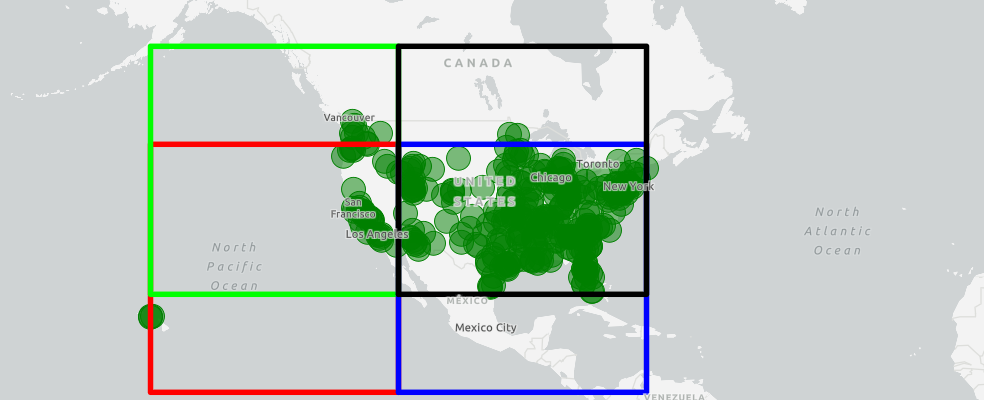

In [67]:
midx = gis.map("United States")
midx

In [41]:
midx.center = [39, -98]
midx.basemap.basemap = 'gray-vector'

In [42]:
# draw the spatial index envelope
df.spatial.plot(map_widget=midx)

True

Let's use the feature we drew earlier to define a spatial reference variable for use throughout the rest of this guide.


In [43]:
sp_ref = camp_pendleton_s_geodefn["spatialReference"]
sp_ref

{'wkid': 102100, 'latestWkid': 3857}

In [44]:
import time
from arcgis.geometry import Geometry, Polygon
from arcgis.map.symbols import SimpleFillSymbolEsriSFS

# define a symbol to visualize the spatial index quadrants
sym = {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [0, 0, 0, 0],
    "outline": {
        "type": "esriSLS",
        "style": "esriSLSSolid",
        "color": [0, 0, 0, 255],
        "width": 4,
    },
}

# loop through the children of the root index and draw each extent
# using a different outline color
for i in range(len(si._index.children)):
    sym["outline"]["color"][i] = 255
    if i > 0:
        sym["outline"]["color"][i] = 255
        sym["outline"]["color"][i - 1] = 0
    child = si._index.children[i]
    width_factor = child.width / 2
    height_factor = child.width / 2
    minx = child.center[0] - width_factor
    miny = child.center[1] - height_factor
    maxx = child.center[0] + width_factor
    maxy = child.center[1] + height_factor
    child_geom = Geometry({
        'rings': [[[minx, miny], [minx, maxy], [maxx, maxy], [maxx, miny], [minx, miny]]],
        'spatialReference': sp_ref})
    # child_extent = Polygon(child_geom)

    sym = SimpleFillSymbolEsriSFS(**sym)
    midx.content.draw(shape=child_geom, symbol=sym)
    time.sleep(2)

## Intersection with the Spatial Index


Up to this point in this guide, we've talked about using indexing for querying attributes in the dataframe. For example:


In [45]:
query = df["ST"] == "MI"
df[query]

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
101,1514,Allendale,Census Designated Place,MI,26,2601340,,6,19709,17579,...,939,94,200,2639,3.26,4834,227,2511,2096,"{""x"": -9568014.259185659, ""y"": 5309698.1042234..."
102,1523,Big Rapids,city,MI,26,2608300,,6,10614,10601,...,436,82,322,1323,2.88,3623,293,1136,2194,"{""x"": -9515614.1943842, ""y"": 5419013.554990504..."
103,1526,Cadillac,city,MI,26,2612320,,6,10547,10355,...,999,179,526,2625,2.9,4927,647,2519,1761,"{""x"": -9508449.13740055, ""y"": 5504118.53341087..."
104,1528,Coldwater,city,MI,26,2617020,,6,10828,10945,...,897,213,445,2628,3.14,4827,572,2576,1679,"{""x"": -9462596.578807637, ""y"": 5152066.1922501..."
105,1529,Comstock Park,Census Designated Place,MI,26,2617700,,6,10892,10088,...,920,167,557,2639,2.96,4656,484,1979,2193,"{""x"": -9537405.970997674, ""y"": 5316589.2811759..."
106,1538,Farmington,city,MI,26,2627380,,6,10674,10372,...,1129,66,287,2735,2.92,4959,335,2876,1748,"{""x"": -9281637.643149175, ""y"": 5230343.3917462..."
107,1546,Grand Haven,city,MI,26,2633340,,6,11073,10412,...,1277,115,320,2721,2.82,5815,1046,3239,1530,"{""x"": -9597693.318165638, ""y"": 5320625.9222716..."
108,1575,Muskegon Heights,city,MI,26,2656360,,6,10657,10856,...,460,143,1183,2682,3.23,4842,846,2042,1954,"{""x"": -9600424.098598039, ""y"": 5342825.5598096..."
109,1600,Sturgis,city,MI,26,2676960,,6,10944,10994,...,835,195,467,2632,3.28,4595,507,2333,1755,"{""x"": -9508726.380150843, ""y"": 5131255.7167436..."


We can query multiple attributes and filter on the column output as well:


In [46]:
query = (df["POP2010"] > 20000) & (df["ST"] == "OH")
df[query][["NAME", "ST", "POP2010", "HOUSEHOLDS", "HSEHLD_1_F", "HSEHLD_1_M"]]

,NAME,ST,POP2010,HOUSEHOLDS,HSEHLD_1_F,HSEHLD_1_M
166,Athens,OH,23832,6903,2474,2573
195,Oxford,OH,21371,5799,2033,1850


As GIS analysts and data scientists, we also want to query based on geographic location. We can do that by building a spatial index with the `sindex` property of the spatial dataframe. The resulting quadtree index allows us to query based on specific geometries in relation to other geometries.

Let's continue looking at the dataframe wer're working with: US cities with a population between the ages of 45 and 54 of less than 1500.

We can draw the entire extent of our dataframe using the dataframe's [`geoextent`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.SpatialDataFrame.geoextent) property. Let's get the bounding box coordinates:


In [47]:
df_geoextent = df.spatial.full_extent
df_geoextent

(-17595352.55942164,
 2429395.3372018305,
 -7895099.852443745,
 6266417.1716177985)

Let's use these coordinates, place them in more descriptive variable names, then create a bounding box to make a geometry object representing the extent of our dataframe. Finally we'll draw it on the a map:


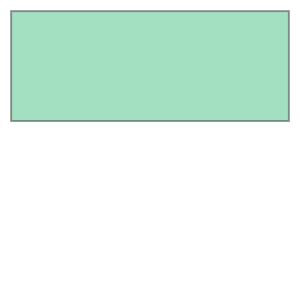

In [48]:
df_geoextent_geom = df.spatial.bbox
df_geoextent_geom


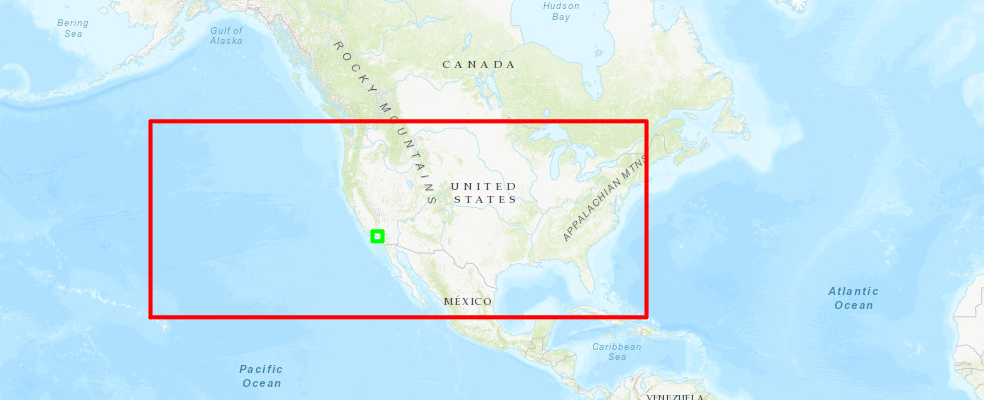

In [68]:
m1 = gis.map("United States")
m1

In [50]:
m1.center = [39, -98]

In [51]:
sym_poly = SimpleFillSymbolEsriSFS(**{
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [0, 0, 0, 0],  # hollow, no fill
    "outline": {
        "type": "esriSLS",
        "style": "esriSLSSolid",
        "color": [255, 0, 0, 255],  # red border
        "width": 3}
})

# draw the dataframe extent with AOI
m1.content.draw(shape=df_geoextent_geom, symbol=sym_poly)

Now, let's define a second set of coordinates representing a bounding box for which we want to query the features from our dataframe that fall within it.

We can define our list of coordinates, and then draw it on the map to make sure it falls within our dataframe extent:


In [52]:
area_of_interest = [
    -13043219.122301877,
    3911134.034258818,
    -13243219.102301877,
    4111134.0542588173,
]
minx, miny, maxx, maxy = (
    area_of_interest[0],
    area_of_interest[1],
    area_of_interest[2],
    area_of_interest[3],
)

area_of_interest_ring = [
    [[minx, miny], [minx, maxy], [maxx, maxy], [maxx, miny], [minx, miny]]
]
area_of_interest_geom = Geometry(
    {"rings": area_of_interest_ring, "spatialReference": sp_ref}
)

sym_poly_aoi = SimpleFillSymbolEsriSFS(**{
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [0, 0, 0, 0],  # hollow, no fill
    "outline": {
        "type": "esriSLS",
        "style": "esriSLSSolid",
        "color": [0, 255, 0, 255],   # green border
        "width": 3}
})

m1.content.draw(shape=area_of_interest_geom, symbol=sym_poly_aoi)

We can see that our area of interest box falls within the dataframe extent. The spatial index has an `intersect` method which takes a bounding box as input and returns a list of integer values from the row index of our spatial dataframe. We can use the dataframe's [`iloc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc) integer-indexing attribute to then loop through the dataframe and put draw the features on a map


In [53]:
index_of_features = si.intersect(area_of_interest)

In [54]:
df.iloc[index_of_features]

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
32,454,Muscoy,Census Designated Place,CA,06,0650132,,6,11161,10644,...,302,194,308,1933,4.76,2443,212,1268,963,"{""x"": -13063141.654215325, ""y"": 4049605.974486..."
69,1035,Camp Pendleton South,Census Designated Place,CA,06,0610561,,6,10450,10616,...,389,37,169,2500,3.69,2865,296,11,2558,"{""x"": -13066535.250599463, ""y"": 3925680.810605..."
70,1053,Citrus,Census Designated Place,CA,06,0613560,,6,11329,10866,...,541,116,255,2195,4.33,2701,86,1854,761,"{""x"": -13123874.444099307, ""y"": 4044252.329385..."
71,1062,Commerce,city,CA,06,0614974,,6,13227,12823,...,549,169,424,2709,4.17,3470,88,1619,1763,"{""x"": -13151212.145498956, ""y"": 4027601.902958..."
77,1158,Home Gardens,Census Designated Place,CA,06,0634302,,6,12223,11570,...,573,135,298,2336,4.35,2865,105,1952,808,"{""x"": -13080593.064290542, ""y"": 4012558.291540..."
81,1177,Laguna Woods,city,CA,06,0639259,,6,17960,16192,...,3264,6,15,3873,2.07,13016,1714,8730,2572,"{""x"": -13105613.458129246, ""y"": 3976538.093303..."


Let us plot these features that intersect on a map:



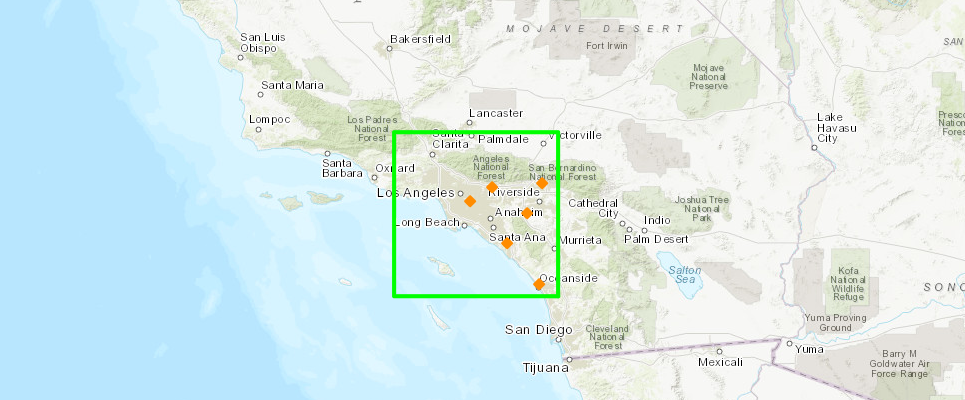

In [69]:
m2 = gis.map("Los Angeles, CA")
m2

In [56]:
m2.center = [34, -118]

In [57]:
m2.content.draw(shape=area_of_interest_geom, symbol=sym_poly_aoi)

In [58]:
from arcgis.map.symbols import SimpleMarkerSymbolEsriSMS

pt_sym = SimpleMarkerSymbolEsriSMS(**{
    "type": "esriSMS",
    "style": "esriSMSDiamond",
    "color": [255, 140, 0, 255],  # yellowish
    "size": 8,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0,
    "outline": {
        "color": [255, 140, 0, 255],
        "width": 1}
})

# draw the AOI that intersects
for pt_index in index_of_features:
    m2.content.draw(shape=df.iloc[pt_index]['SHAPE'], symbol=pt_sym)

Thus we were able to use the spatial indexes to query features that fall within an extent.


## Spatial Joins

DataFrames are table-like structures comprised of rows and columns. In relational database, SQL `joins` are fundamental operations that combine columns from one or more tables using values that are common to each. They occur in almost all database queries.

A Spatial join is a table operation that affixes data from one feature layer’s attribute table to another based on a spatial relationship. The spatial join involves matching rows from the Join Features (data frame1) to the Target Features (data frame2) based on their spatial relationship.

Let's look at how joins work with dataframes by using subsets of our original DataFrame and the pandas `merge` fucntionality. We'll then move onto examining a spatial join to combine features from one dataframe with another based on a common attribute value.

Query the DataFrame to extract 3 attribute columns of information from 2 states, Ohio and Michigan:


In [59]:
query = (df["ST"] == "OH") | (df["ST"] == "MI")
df1 = df[query][["NAME", "ST", "POP2010"]]
df1

,NAME,ST,POP2010
101,Allendale,MI,17579
102,Big Rapids,MI,10601
103,Cadillac,MI,10355
104,Coldwater,MI,10945
105,Comstock Park,MI,10088
106,Farmington,MI,10372
107,Grand Haven,MI,10412
108,Muskegon Heights,MI,10856
109,Sturgis,MI,10994
166,Athens,OH,23832


Query the dataframe again for 8 attribute columns from one state, Ohio


In [60]:
query = df["ST"] == "OH"
df2 = df[query][
    [
        "NAME",
        "POPULATION",
        "BLACK",
        "HAWN_PI",
        "HISPANIC",
        "WHITE",
        "MULT_RACE",
        "OTHER",
    ]
]
df2

,NAME,POPULATION,BLACK,HAWN_PI,HISPANIC,WHITE,MULT_RACE,OTHER
166,Athens,25431,1047,10,576,20586,559,138
167,Cambridge,10541,361,3,129,9857,316,33
168,Celina,10566,50,41,293,9873,164,111
192,Galion,10385,50,1,140,10264,120,42
193,London,10543,596,0,169,8830,287,61
194,Northbrook,10825,2974,6,377,6995,379,141
195,Oxford,23054,859,2,491,18719,478,127
196,Springdale,11507,3355,44,1965,6169,331,977
197,Trenton,12393,115,2,198,11418,224,35
198,University Heights,13884,3133,4,374,9726,215,121


The Pandas [`merge`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) capability joins dataframes in a style similar to SQL joins, with parameters to indicate the column of shared information and the type of join to perform:

An `inner` join (the default), is analagous to a SQL left inner join, keeping the order from the left table in the output and returning only those records from the right table that match the value in the column specified with the `on` parameter:


In [61]:
import pandas as pd

pd.merge(df1, df2, on="NAME", how="inner")

,NAME,ST,POP2010,POPULATION,BLACK,HAWN_PI,HISPANIC,WHITE,MULT_RACE,OTHER
0,Athens,OH,23832,25431,1047,10,576,20586,559,138
1,Cambridge,OH,10635,10541,361,3,129,9857,316,33
2,Celina,OH,10400,10566,50,41,293,9873,164,111
3,Galion,OH,10512,10385,50,1,140,10264,120,42
4,London,OH,9904,10543,596,0,169,8830,287,61
5,Northbrook,OH,10668,10825,2974,6,377,6995,379,141
6,Oxford,OH,21371,23054,859,2,491,18719,478,127
7,Springdale,OH,11223,11507,3355,44,1965,6169,331,977
8,Trenton,OH,11869,12393,115,2,198,11418,224,35
9,University Heights,OH,13539,13884,3133,4,374,9726,215,121


Notice how all the rows from the left `DataFrame` appear in the result with all the attribute columns and values appended from the right `DataFrame` where the column value of `NAME` matched. The `POP2010` attribute from the left `DataFrame` is combined with all the attributes from the right `DataFrame`.


An `outer` join combines all rows from both outputs together and orders the results according to the original row index:


In [62]:
pd.merge(df1, df2, on="NAME", how="outer")

,NAME,ST,POP2010,POPULATION,BLACK,HAWN_PI,HISPANIC,WHITE,MULT_RACE,OTHER
0,Allendale,MI,17579,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Big Rapids,MI,10601,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Cadillac,MI,10355,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Coldwater,MI,10945,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Comstock Park,MI,10088,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,Farmington,MI,10372,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,Grand Haven,MI,10412,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,Muskegon Heights,MI,10856,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,Sturgis,MI,10994,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,Athens,OH,23832,25431,1047,10,576,20586,559,138


The rows where the on parameter value is the same in both tables have all attributes from both DataFrames in the result. The rows from the first DataFrame that do not have a matching `NAME` value in the second dataframe have values filled in with `NaN` values.


A spatial join works similarly on matching attribute values. However, instead of joining on an attribue field (like you did earlier), you will join based on the spatial relationship between the records in the two tables.

### Example: Merging State Statistics Information with Cities

The goal is to get Wyoming's city locations and census data joined with Wyoming's state census data.

> If you do not have access to the `ArcPy` site-package from the Python interpreter used to execute the following cells, you must authenticate to an ArcGIS Online Organization or ArcGIS Enterprise portal.


In [1]:
from arcgis.gis import GIS

In [65]:
g2 = GIS(profile="your_enterprise_profile")

In [2]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [23]:
import os

data_pth = r"/path/to/your/data/census_2010/example"
cities = r"cities.shp"
states = r"states.shp"

In [12]:
sdf_target = pd.DataFrame.spatial.from_featureclass(
    os.path.join(data_pth, cities))
sdf_target.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIP,CAPITAL,AREALAND,AREAWATER,POP_CLASS,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,0,College,Census Designated Place,AK,02,16750,,18.670,0.407,6,...,936,152,339,2640,3.13,4501,397,2395,1709,"{""x"": -147.8271911572905, ""y"": 64.848300194159..."
1,1,Fairbanks,City,AK,02,24230,,31.857,0.815,6,...,2259,395,1058,7187,3.15,12357,1282,3863,7212,"{""x"": -147.72638163006846, ""y"": 64.83809069704..."
2,2,Kalispell,City,MT,30,40075,,5.458,0.004,6,...,1433,147,480,3494,2.92,6532,390,3458,2684,"{""x"": -114.31606412429451, ""y"": 48.19780017936..."
3,3,Post Falls,City,ID,16,64810,,9.656,0.045,6,...,1851,205,467,4670,3.13,6697,328,4611,1758,"{""x"": -116.93792709825782, ""y"": 47.71555468018..."
4,4,Dishman,Census Designated Place,WA,53,17985,,3.378,0.000,6,...,1096,131,345,2564,2.96,4408,257,2635,1516,"{""x"": -117.27780913774282, ""y"": 47.65654568420..."


Define a [SpatialReference](https://developers.arcgis.com/python/api-reference/arcgis.geometry.html#arcgis.geometry.SpatialReference) object to pass as the second argument in the `from_featureclass` function, so calling the method can also project (or transform) output GeoDataFrame to your desired spatial reference. Note: this requires arcpy to work.


In [32]:
from arcgis.geometry import SpatialReference

sdf_join = pd.DataFrame.spatial.from_featureclass(
    os.path.join(data_pth, states), sr=SpatialReference(4326).as_arcpy
)
sdf_join.head()

,FID,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,SHAPE
0,0,Hawaii,1,15,Pacific,HI,"{""rings"": [[[-160.07380334546815, 22.004177347..."
1,1,Washington,2,53,Pacific,WA,"{""rings"": [[[-122.40201531038355, 48.225216372..."
2,2,Montana,3,30,Mountain,MT,"{""rings"": [[[-111.47542530020736, 44.702162369..."
3,3,Maine,4,23,New England,ME,"{""rings"": [[[-69.77727626137293, 44.0741483685..."
4,4,North Dakota,5,38,West North Central,ND,"{""rings"": [[[-98.73043728833767, 45.9382713702..."


We will use python's list comprehensions to create lists of the attribute columns in the DataFrame, then print out the lists to see the names of all the attribute columns.


In [33]:
sdf_target_cols = [column for column in sdf_target.columns]
sdf_join_cols = [column for column in sdf_join.columns]

Print out a list of columns in the `sdf_target` dataframe created from the cities shapefile:


In [34]:
for a, b, c, d in zip(
    sdf_target_cols[::4],
    sdf_target_cols[1::4],
    sdf_target_cols[2::4],
    sdf_target_cols[3::4],
):
    print("{:<30}{:<30}{:<30}{:<}".format(a, b, c, d))

FID                           NAME                          CLASS                         ST
STFIPS                        PLACEFIP                      CAPITAL                       AREALAND
AREAWATER                     POP_CLASS                     POP2000                       POP2007
WHITE                         BLACK                         AMERI_ES                      ASIAN
HAWN_PI                       OTHER                         MULT_RACE                     HISPANIC
MALES                         FEMALES                       AGE_UNDER5                    AGE_5_17
AGE_18_21                     AGE_22_29                     AGE_30_39                     AGE_40_49
AGE_50_64                     AGE_65_UP                     MED_AGE                       MED_AGE_M
MED_AGE_F                     HOUSEHOLDS                    AVE_HH_SZ                     HSEHLD_1_M
HSEHLD_1_F                    MARHH_CHD                     MARHH_NO_C                    MHH_CHILD
FHH_CHILD      

Print out a list of columns in the `sdf_join` dataframe created from the states shapefile:


In [35]:
for a, b, c, d, e in zip(
    sdf_join_cols[::5],
    sdf_join_cols[1::5],
    sdf_join_cols[2::5],
    sdf_join_cols[3::5],
    sdf_join_cols[4::5],
):
    print("{:<20}{:<20}{:<20}{:<20}{:<}".format(a, b, c, d, e))

FID                 STATE_NAME          DRAWSEQ             STATE_FIPS          SUB_REGION


Create a DataFrame for the cities in Wyoming:


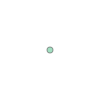

In [36]:
sdf_target.loc[0]["SHAPE"].as_arcpy

In [37]:
q = sdf_target["ST"] == "WY"
left = sdf_target[q].copy()
left.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIP,CAPITAL,AREALAND,AREAWATER,POP_CLASS,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
711,711,Green River,City,WY,56,33740,,13.706,0.315,6,...,1278,113,251,3214,3.22,4426,249,3169,1008,"{""x"": -109.46492712301152, ""y"": 41.51419117328..."
712,712,Rock Springs,City,WY,56,67235,,18.441,0.000,6,...,2012,220,536,4931,3.02,8359,1011,5274,2074,"{""x"": -109.22240010498797, ""y"": 41.59092714080..."
715,715,Evanston,City,WY,56,25620,,10.245,0.044,6,...,976,139,369,2940,3.30,4665,607,2805,1253,"{""x"": -110.96461812552366, ""y"": 41.26330015271..."
764,764,Laramie,City,WY,56,45050,,11.138,0.019,6,...,2496,174,587,5608,2.83,11994,658,5379,5957,"{""x"": -105.58725462620347, ""y"": 41.31292665660..."
766,766,Cheyenne,City,WY,56,13900,State,21.108,0.082,7,...,6299,490,1610,14174,2.93,23782,1458,14739,7585,"{""x"": -104.80204559586696, ""y"": 41.14554516058..."


Create a dataframe for the state of Wyoming:


In [38]:
q = sdf_join.STATE_ABBR == "WY"
right = sdf_join[q].copy()
right.head()

,FID,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,SHAPE
6,6,Wyoming,7,56,Mountain,WY,"{""rings"": [[[-104.05361529329527, 41.698218366..."


Perform the spatial join:


Before performing a spatial join between these two DataFrame objects, we can check the `SpatialReference` of each one of them to validate if they are the same SR - this is a pre-requisite of joining two DataFrames.


In [39]:
left.spatial.sr

{'wkid': 4326, 'latestWkid': 4326}

In [40]:
right.spatial.sr

{'wkid': 4326, 'latestWkid': 4326}

In [41]:
sdf2 = left.spatial.join(right)
sdf2

,FID_left,NAME,CLASS,ST,STFIPS,PLACEFIP,CAPITAL,AREALAND,AREAWATER,POP_CLASS,...,OWNER_OCC,RENTER_OCC,SHAPE,index_right,FID_right,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR
0,711,Green River,City,WY,56,33740,,13.706,0.315,6,...,3169,1008,"{""x"": -109.46492712301152, ""y"": 41.51419117328...",6,6,Wyoming,7,56,Mountain,WY
1,712,Rock Springs,City,WY,56,67235,,18.441,0.000,6,...,5274,2074,"{""x"": -109.22240010498797, ""y"": 41.59092714080...",6,6,Wyoming,7,56,Mountain,WY
2,715,Evanston,City,WY,56,25620,,10.245,0.044,6,...,2805,1253,"{""x"": -110.96461812552366, ""y"": 41.26330015271...",6,6,Wyoming,7,56,Mountain,WY
3,764,Laramie,City,WY,56,45050,,11.138,0.019,6,...,5379,5957,"{""x"": -105.58725462620347, ""y"": 41.31292665660...",6,6,Wyoming,7,56,Mountain,WY
4,766,Cheyenne,City,WY,56,13900,State,21.108,0.082,7,...,14739,7585,"{""x"": -104.80204559586696, ""y"": 41.14554516058...",6,6,Wyoming,7,56,Mountain,WY
5,1216,Sheridan,City,WY,56,69845,,8.486,0.018,6,...,4446,2559,"{""x"": -106.95897260592156, ""y"": 44.79671814410...",6,6,Wyoming,7,56,Mountain,WY
6,1218,Casper,City,WY,56,13150,,23.945,0.316,6,...,13616,6727,"{""x"": -106.32506361818486, ""y"": 42.83466364743...",6,6,Wyoming,7,56,Mountain,WY
7,1219,Gillette,City,WY,56,31855,,13.369,0.025,6,...,4867,2523,"{""x"": -105.50525462413556, ""y"": 44.28266365145...",6,6,Wyoming,7,56,Mountain,WY


Notice, you retain the geometry type of your left DataFrame (points) in this case, however, you get all the attributes from both the left and right DataFrames. Let us plot the results of the spatial join on a map:



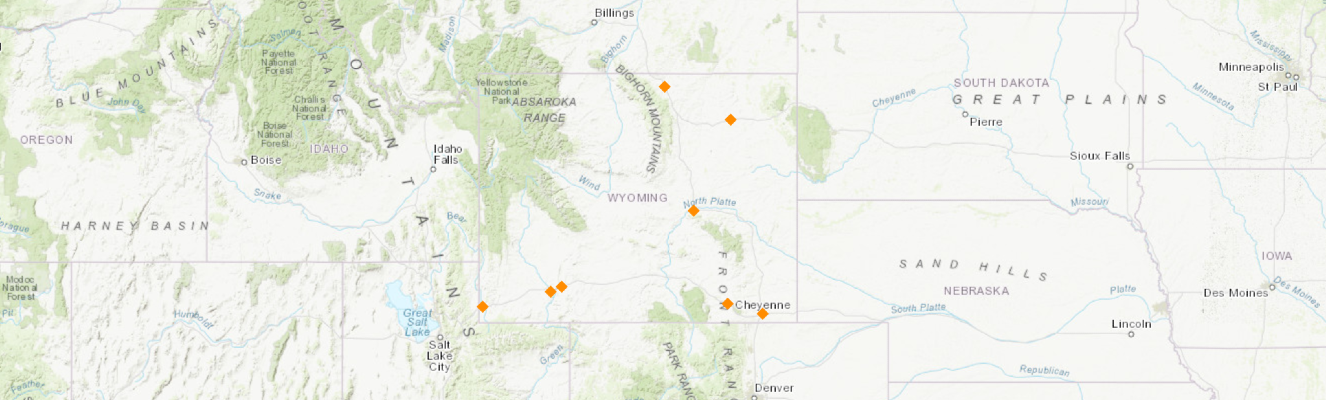

In [48]:
m3 = gis.map("Wyoming")
m3

In [44]:
m3.center = [43, -107]

In [47]:
# draw the spatial join results on Wyoming state
for idx, row in sdf2.iterrows():
    m3.content.draw(row['SHAPE'], symbol=pt_sym)

## Conclusion

Spatially Enabled DataFrame give you powerful data analysis and data wrangling capabilities. In addition to performing sql like operations on attribute data, you can perform geographic queries. This guide demonstrated some of these advanced capabilities of the SEDF.
